# Part I - Ford GoBike System (FGBS) Data
## by Chiebuka Okoro

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Loading the dataset into a dataframe named FGBS
FGBS = pd.read_csv("Ford GoBike System Data.csv")

#Checking to see if the data was properly loaded into the dataframe by displaying the first five rows
FGBS.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#For the sake of the analysis to be done, I will create some new columns to account for the days bikes are picked up and returned

#Returns the a column of bike pickup days
FGBS['start_time'] = pd.to_datetime(FGBS['start_time'])
FGBS['pickup_day'] = FGBS['start_time'].dt.day_name()

#Returns the a column of bike return days
FGBS['end_time'] = pd.to_datetime(FGBS['end_time'])
FGBS['return_day'] = FGBS['end_time'].dt.day_name()

FGBS['year'] = FGBS['start_time'].dt.year

FGBS['age'] = FGBS['year'] - FGBS['member_birth_year']

#FGBS['pickup_day_num'] = FGBS['start_time'].dt.dayofweek
#FGBS['return_day_num'] = FGBS['end_time'].dt.dayofweek

FGBS.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,pickup_day,return_day,year,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,Friday,2019,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,Friday,2019,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,Friday,2019,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,Friday,2019,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,Friday,2019,45.0


In [4]:
#FGBS Data structure
FGBS.shape

(183412, 20)

### What is the structure of your dataset?

(183412, 16)

### What is/are the main feature(s) of interest in your dataset?

duration_sec, start_time, end_date, start_station_id, end_station_id, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

duration_sec, start_time, end_date, start_station_id, end_station_id, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip

## Data Assessing and Cleaning

In [5]:
FGBS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

From the above, there are some missing data from all others columns except: duration_sec, start_time, end_time, start_location_latitiude, start_location_longitude, end_location_longitude, end_location_latitude, bike_id, user_type, and bike_share_for_all_trip. Before going on to do any other assessment, I will be dropping the following tables as they won't be needed for my analysis and visualization:

    * start_location_latitiude
    * start_location_longitude
    * end_location_longitude
    * end_location_latitude
    * start_station_name
    * end_station_name
    
The end and start station name is being take out because each station have a unique id

In [6]:
# Create a copy of the dataframe for cleaning
bike = FGBS.copy()

#Remove all the columns stated above
bike.drop(['start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_name',
       'end_station_latitude', 'end_station_longitude'], axis='columns', inplace=True)

#Check to be sure those columns no longer exist
bike.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,pickup_day,return_day,year,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,13.0,4902,Customer,1984.0,Male,No,Thursday,Friday,2019,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,81.0,2535,Customer,NaN,NaN,No,Thursday,Friday,2019,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,3.0,5905,Customer,1972.0,Male,No,Thursday,Friday,2019,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,70.0,6638,Subscriber,1989.0,Other,No,Thursday,Friday,2019,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,222.0,4898,Subscriber,1974.0,Male,Yes,Thursday,Friday,2019,45.0


In [7]:
bike['bike_id'] = bike['bike_id'].map(str)
bike['start_station_id'] = bike['start_station_id'].map(str)
bike['end_station_id'] = bike['end_station_id'].map(str)

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   end_station_id           183412 non-null  object        
 5   bike_id                  183412 non-null  object        
 6   user_type                183412 non-null  object        
 7   member_birth_year        175147 non-null  float64       
 8   member_gender            175147 non-null  object        
 9   bike_share_for_all_trip  183412 non-null  object        
 10  pickup_day               183412 non-null  object        
 11  return_day               183412 non-null  object        
 12  year            

In [8]:
bike.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              330
end_station_id                330
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
pickup_day                      7
return_day                      7
year                            1
age                            75
dtype: int64

From the above, it can be concluded that:

1. There are 329 stations
2. There are 4646 bikes in operation

Also, the following question need to be answered: Why 3 member gender?

In [9]:
bike.describe()

,duration_sec,member_birth_year,year,age
count,183412.000000,175147.000000,183412.0,175147.000000
mean,726.078435,1984.806437,2019.0,34.193563
std,1794.389780,10.116689,0.0,10.116689
min,61.000000,1878.000000,2019.0,18.000000
25%,325.000000,1980.000000,2019.0,27.000000
50%,514.000000,1987.000000,2019.0,32.000000
75%,796.000000,1992.000000,2019.0,39.000000
max,85444.000000,2001.000000,2019.0,141.000000


The number of rows across each column is not uniform. This signifies that there are null values within the data. I will be dropping null values in the next cell.

In [10]:
#Drop null values
bike = bike.dropna()

#Let's see if those rows were dropped
bike.describe()

,duration_sec,member_birth_year,year,age
count,175147.000000,175147.000000,175147.0,175147.000000
mean,704.211845,1984.806437,2019.0,34.193563
std,1641.608363,10.116689,0.0,10.116689
min,61.000000,1878.000000,2019.0,18.000000
25%,323.000000,1980.000000,2019.0,27.000000
50%,510.000000,1987.000000,2019.0,32.000000
75%,789.000000,1992.000000,2019.0,39.000000
max,84548.000000,2001.000000,2019.0,141.000000


Overall, we now have 174952 records on all columns

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### What gender patronizes our business the most?

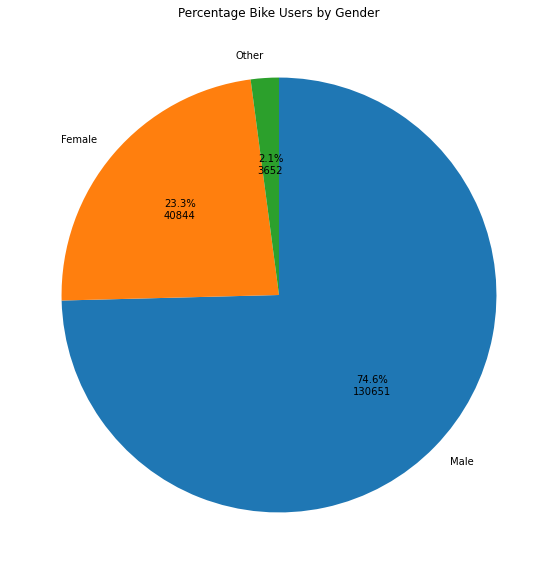

In [11]:
total_gender = bike['member_gender'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total_gender*x/100)

plt.figure(figsize=(10,10))
plt.pie(bike['member_gender'].value_counts().values, labels=bike['member_gender'].value_counts().index, startangle=90, counterclock = False, autopct=fmt);
#plt.legend(title = 'Gender: ')
plt.title('Percentage Bike Users by Gender')
plt.show()

From the pie chart above, it can be seen that men are the major custome of the business. What can be done to close he gap between men and women? Should more incentives/discounts be given.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### What type of user uses our services the most?

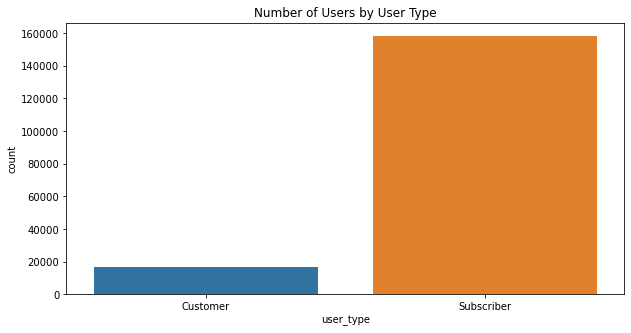

In [12]:
plt.figure(figsize=(10,5))
plt.title('Number of Users by User Type')
sb.countplot(data=bike, x='user_type');

From the plot above, Subscribers patronize our business than Customers

### On an average, what's the rental duration for each user type?

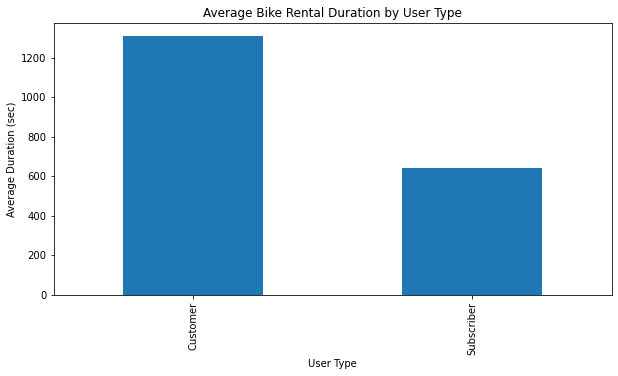

In [13]:
avg_bike_time = bike.groupby(['user_type'])['duration_sec'].mean()

avg_bike_time.plot(kind='bar', title='Average Bike Rental Duration by User Type', ylabel='Average Duration (sec)',
         xlabel='User Type', figsize=(10, 5));

From the above, the customer user type habe the highest bike rental duration (sec) on average

### What day of the week do we have more bike pickups?

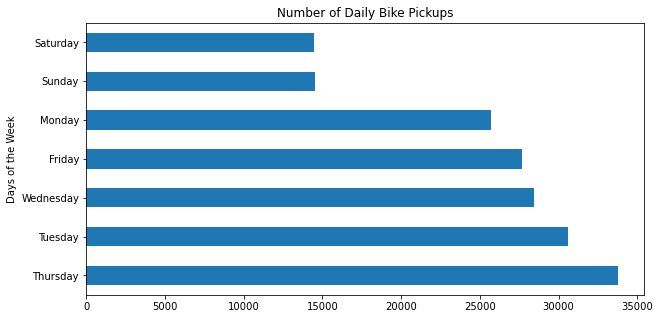

In [14]:
pickup_day_count = bike['pickup_day'].value_counts()

pickup_day_count.plot(kind='barh', title='Number of Daily Bike Pickups',
        xlabel='Days of the Week', figsize=(10, 5));

Most bikes are picked up on Thursday while the least pickup are experienced during the weekend (Saturday & Sunday)

In [15]:
#What day of the week do we have more bike return?
#return_day_count = bike['return_day'].value_counts()

#return_day_count.plot(kind='barh', title='Number of Daily Bike Returns',
#        xlabel='Days of the Week', figsize=(10, 5));

### What category of user_type shares bike?

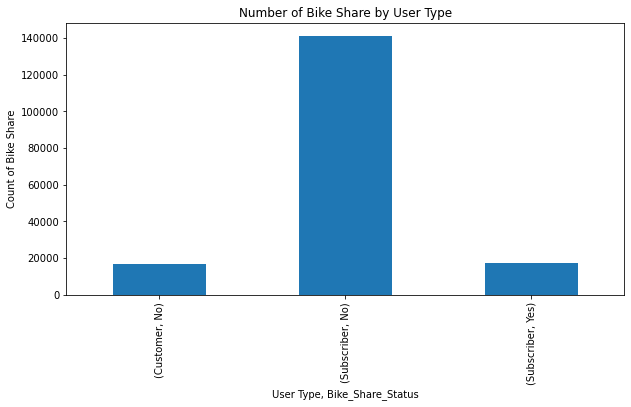

In [16]:
bike_share = bike.groupby(['user_type'])['bike_share_for_all_trip'].value_counts()

bike_share.plot(kind='bar', title='Number of Bike Share by User Type', ylabel='Count of Bike Share',
         xlabel='User Type, Bike_Share_Status', figsize=(10, 5));


Our customer user type don't share bike while a minority of subscriber user type do.

### What age range do most of our uses fall under?

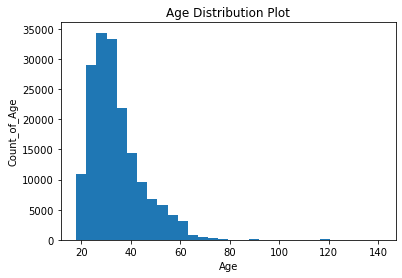

In [29]:
#plt.hist(, bins=7, edgecolor="yellow", color="green")
#plt.show()

plt.hist(bike['age'], bins = 30);
plt.title('Age Distribution Plot')
plt.xlabel('Age');
plt.ylabel('Count_of_Age');

Majority of our users are between age 18 and 40

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. This business have more Subcribers than Customers
2. Customers have a higher average rental time than Subcribers
3. Only a minority of our users uses bike sharing
3. Most of our customers are male
4. Most bikes are picked up on Thursday

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1. I took of some columns as I won't be needing them for my analysis
2. I added two new columns (though similar) that was needed.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [18]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,pickup_day,return_day,year,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,13.0,4902,Customer,1984.0,Male,No,Thursday,Friday,2019,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,3.0,5905,Customer,1972.0,Male,No,Thursday,Friday,2019,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,70.0,6638,Subscriber,1989.0,Other,No,Thursday,Friday,2019,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,222.0,4898,Subscriber,1974.0,Male,Yes,Thursday,Friday,2019,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,323.0,5200,Subscriber,1959.0,Male,No,Thursday,Friday,2019,60.0


### What is the relationship between age and rental duration (sec)?

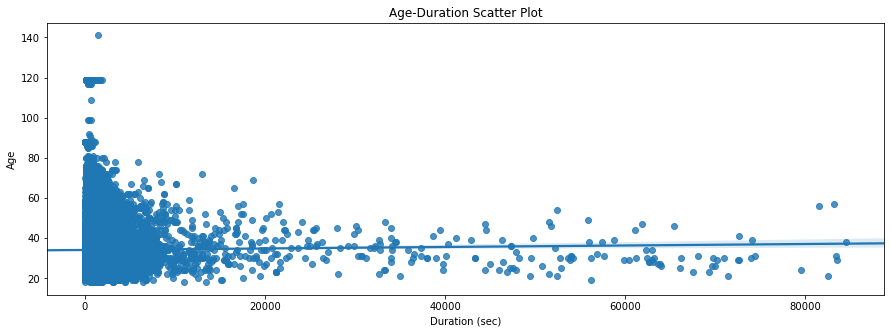

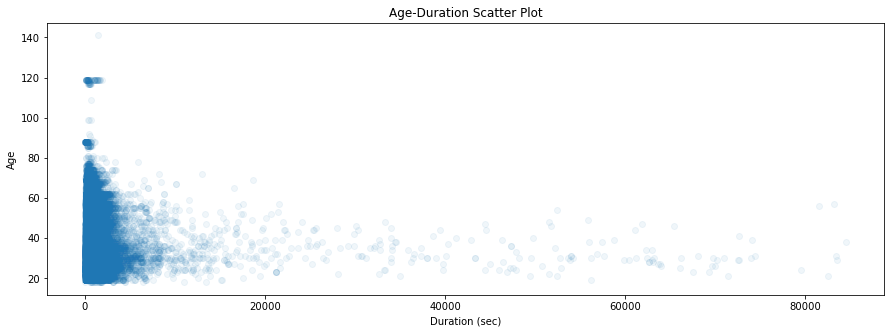

In [19]:
#What is the relationship between age and rental duration (sec)
plt.figure(figsize = [15, 5])

#plt.subplot(1, 2, 1)
sb.regplot(data = bike, x = 'duration_sec', y = 'age', truncate=False);
plt.title('Age-Duration Scatter Plot');
plt.xlabel('Duration (sec)');
plt.ylabel('Age');

plt.figure(figsize = [15, 5])
plt.scatter(data = bike, x = 'duration_sec', y = 'age', alpha = 1/16)
plt.title('Age-Duration Scatter Plot')
plt.xlabel('Duration (sec)');
plt.ylabel('Age');

The regression line in a scatter plot showing a positive correlation between the two variables

### What age range has rhe highest rental duration?

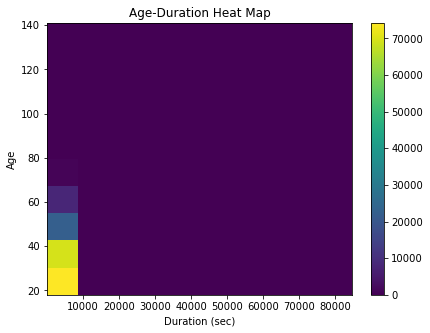

In [20]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 2)
plt.hist2d(data = bike, x = 'duration_sec', y = 'age')
plt.colorbar()
plt.title('Age-Duration Heat Map')
plt.xlabel('Duration (sec)');
plt.ylabel('Age');

All duration were less than 10,000 seconds and there are more than 70,000 records where the user is between the age 18 and about 35 years

### What age bracket does each gender fall under the most?

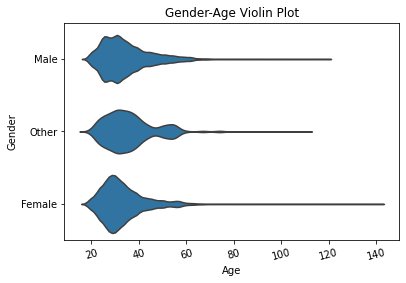

In [39]:
base_color = sb.color_palette()[0]
sb.violinplot(data=bike, y='member_gender', x='age', color=base_color, inner=None)
plt.xticks(rotation=15);
plt.title('Gender-Age Violin Plot');
plt.xlabel('Age');
plt.ylabel('Gender');

A very large percentage of user age for all gender fall within 20 and 40 years

### This is a more detailed violin plot as in contains aboxplot in its center

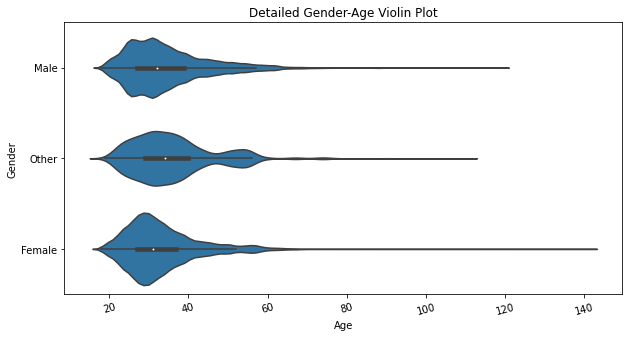

In [38]:
plt.figure(figsize = [10, 5])
ax1 = sb.violinplot(data=bike, y='member_gender', x='age', color=base_color)
plt.xticks(rotation=15);
plt.title('Detailed Gender-Age Violin Plot');
plt.xlabel('Age');
plt.ylabel('Gender');

### Are there outliers in our age column?

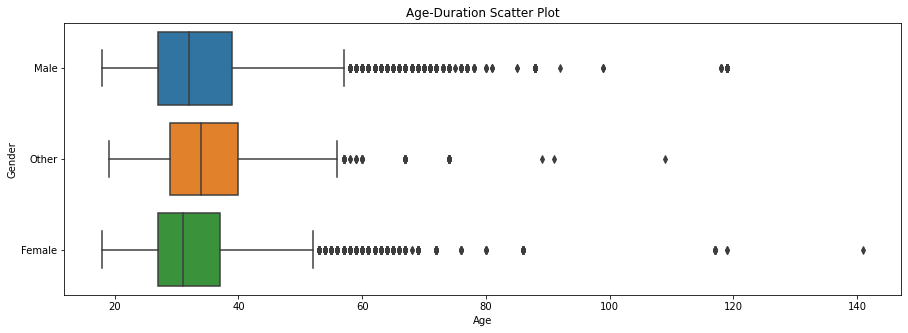

In [37]:
plt.figure(figsize = [15, 5])
sb.boxplot(data=bike, y='member_gender', x='age');
plt.title('Gender-Age Box Plot');
plt.title('Age-Duration Scatter Plot')
plt.xlabel('Age');
plt.ylabel('Gender');

Yes, there are outliers because I can't imagine a person greater than 100 years riding a bike. I will take this as an exception with the reason being that a grandchild used his grandparents card/account to rent the bike

### Are our older user in terms of age subscribers or customer?

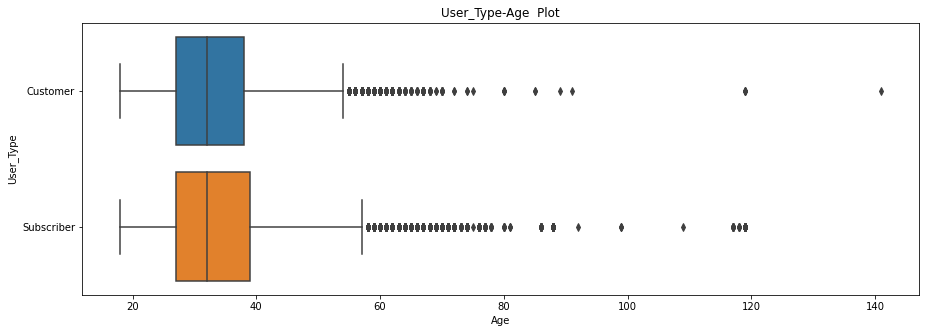

In [36]:
plt.figure(figsize = [15, 5])
sb.boxplot(data=bike, y='user_type', x='age');
plt.title('User_Type-Age  Plot');
plt.xlabel('Age');
plt.ylabel('User_Type');

From the above, our oldest user who is a woman is a Customer while the joint second oldest are Subriber and Customer

### What is the age of major patronisers by user type?

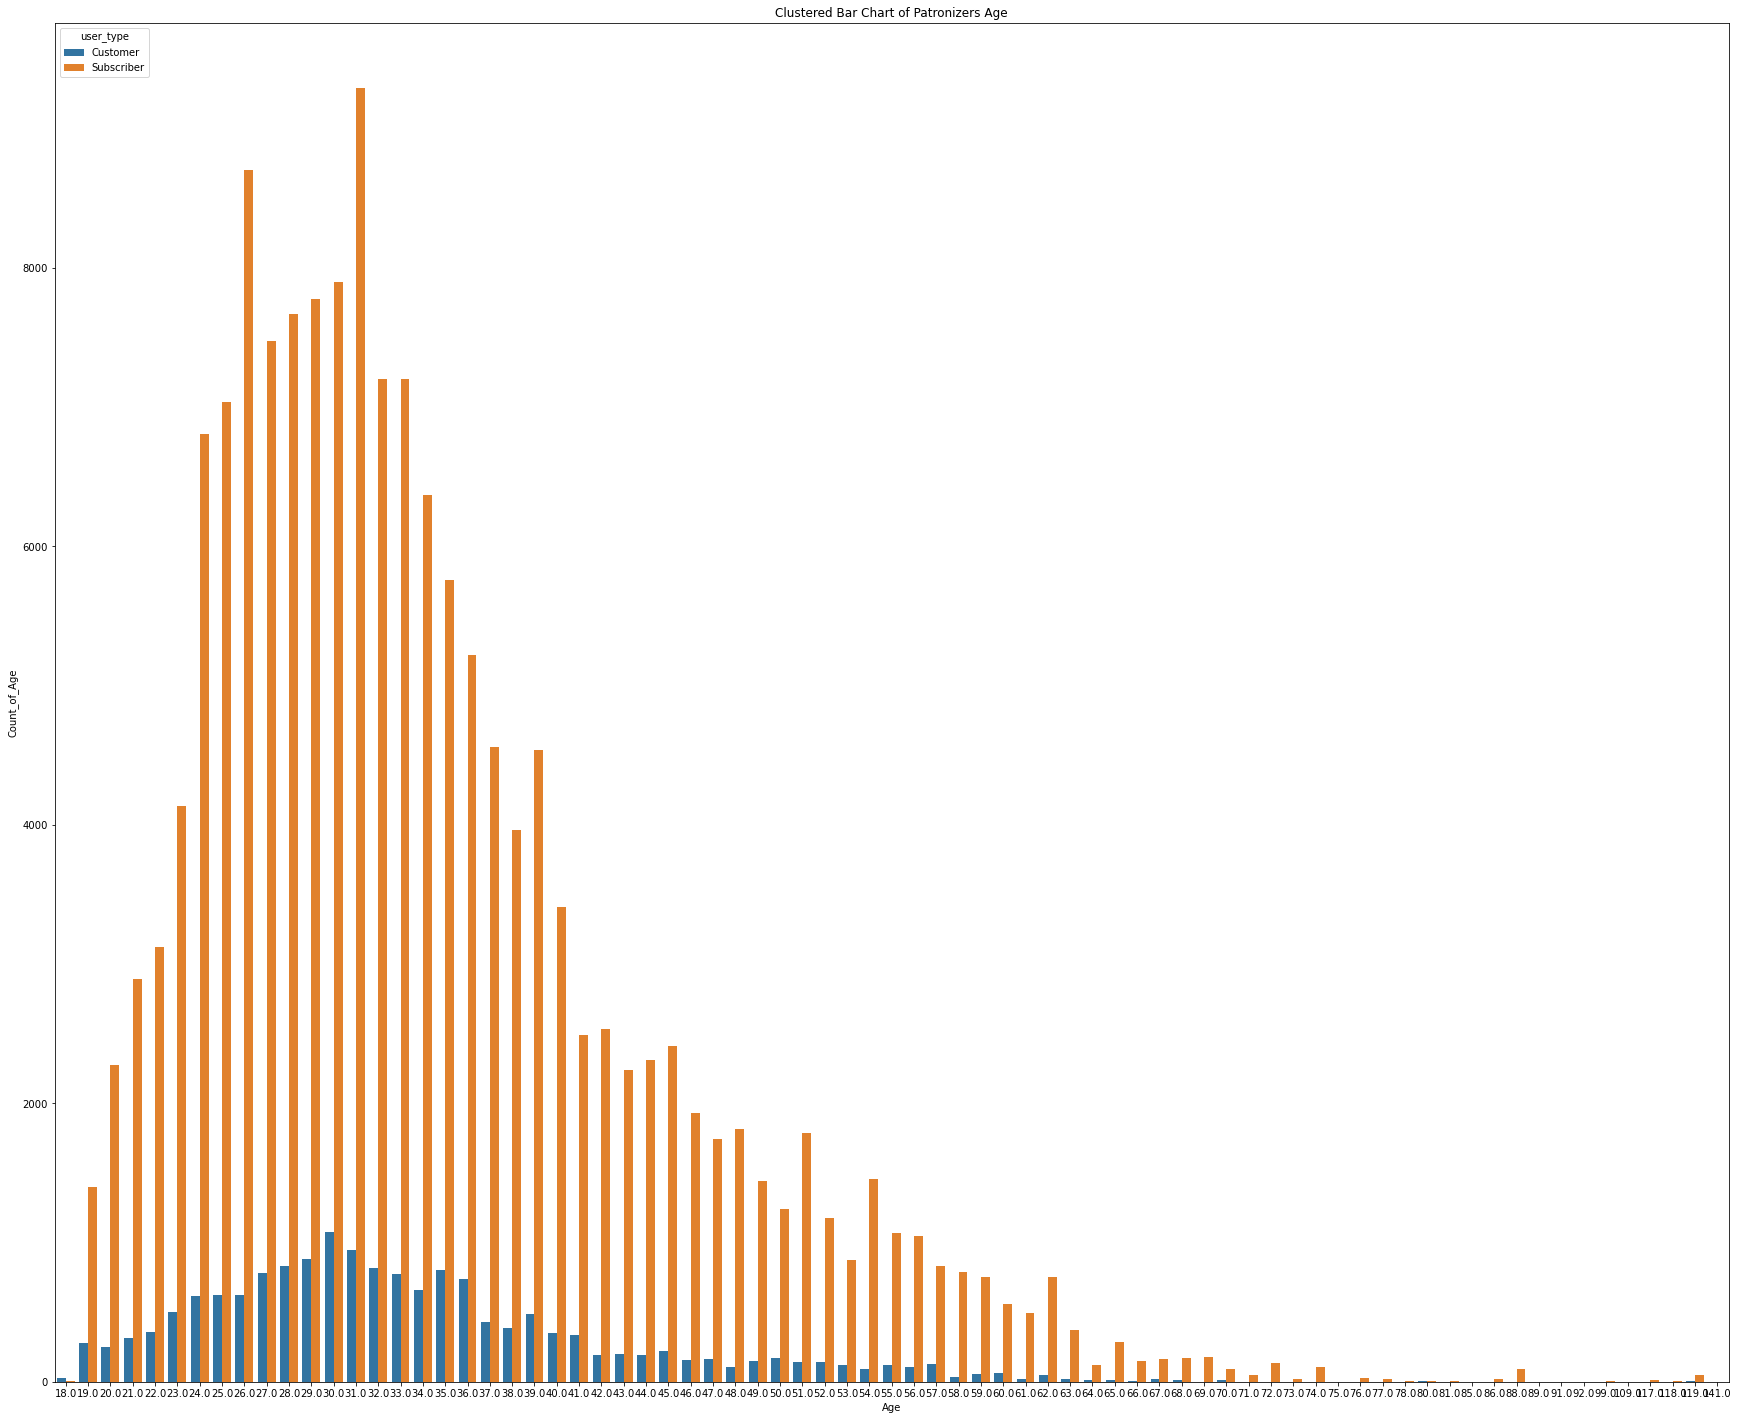

In [44]:
plt.figure(figsize = [30, 25])
sb.countplot(data = bike, x = 'age', hue = 'user_type');
plt.title('Clustered Bar Chart of Patronizers Age')
plt.xlabel('Age');
plt.ylabel('Count_of_Age');

Below is my finding from the plot above:

Subscriber User Type: 31 years


Customer User Type: 30 years

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. Though there is a positive correlation between age and duration, it doesn't say it all.
2. Our business's larger patronisers fall with between 18 and 35 years approximately
3. There are outliers in our data but exceptions exist.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [26]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,pickup_day,return_day,year,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,13.0,4902,Customer,1984.0,Male,No,Thursday,Friday,2019,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,3.0,5905,Customer,1972.0,Male,No,Thursday,Friday,2019,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,70.0,6638,Subscriber,1989.0,Other,No,Thursday,Friday,2019,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,222.0,4898,Subscriber,1974.0,Male,Yes,Thursday,Friday,2019,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,323.0,5200,Subscriber,1959.0,Male,No,Thursday,Friday,2019,60.0


### What is the relationship between age and duration as it relates to user_type

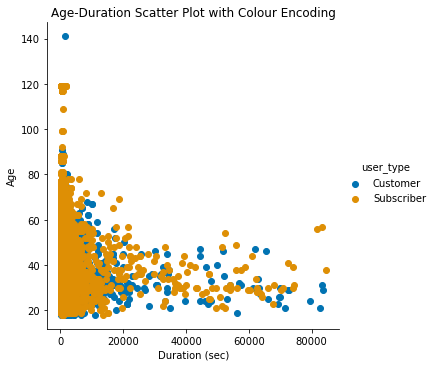

In [47]:
g = sb.FacetGrid(data = bike, hue = 'user_type', height = 5, palette = 'colorblind');
g.map(plt.scatter, 'duration_sec', 'age');
g.add_legend();
plt.title('Age-Duration Scatter Plot with Colour Encoding')
plt.xlabel('Duration (sec)');
plt.ylabel('Age');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There is no much difference between this scatter plot and that of the one done in bivariate just colour to identify the user typr.

### Were there any interesting or surprising interactions between features?

No

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.
1. Majority of our users are males.
2. Most of our users are Subscribers.
3. On average, the Customer user have the highest duration (seconds).
4. Thursday is the most busy pickup day for our business.
5. Majority of our users are within the age 18 and 40 years

In [28]:
bike.to_csv('ford_gobike.csv', index=False)